Training Score: 0.9268371641307867
Testing Score: 0.9135922330097087
Accuracy Score: 0.9135922330097087
Confusion Matrix: 
[[896  34]
 [ 55  45]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       930
           1       0.57      0.45      0.50       100

    accuracy                           0.91      1030
   macro avg       0.76      0.71      0.73      1030
weighted avg       0.91      0.91      0.91      1030



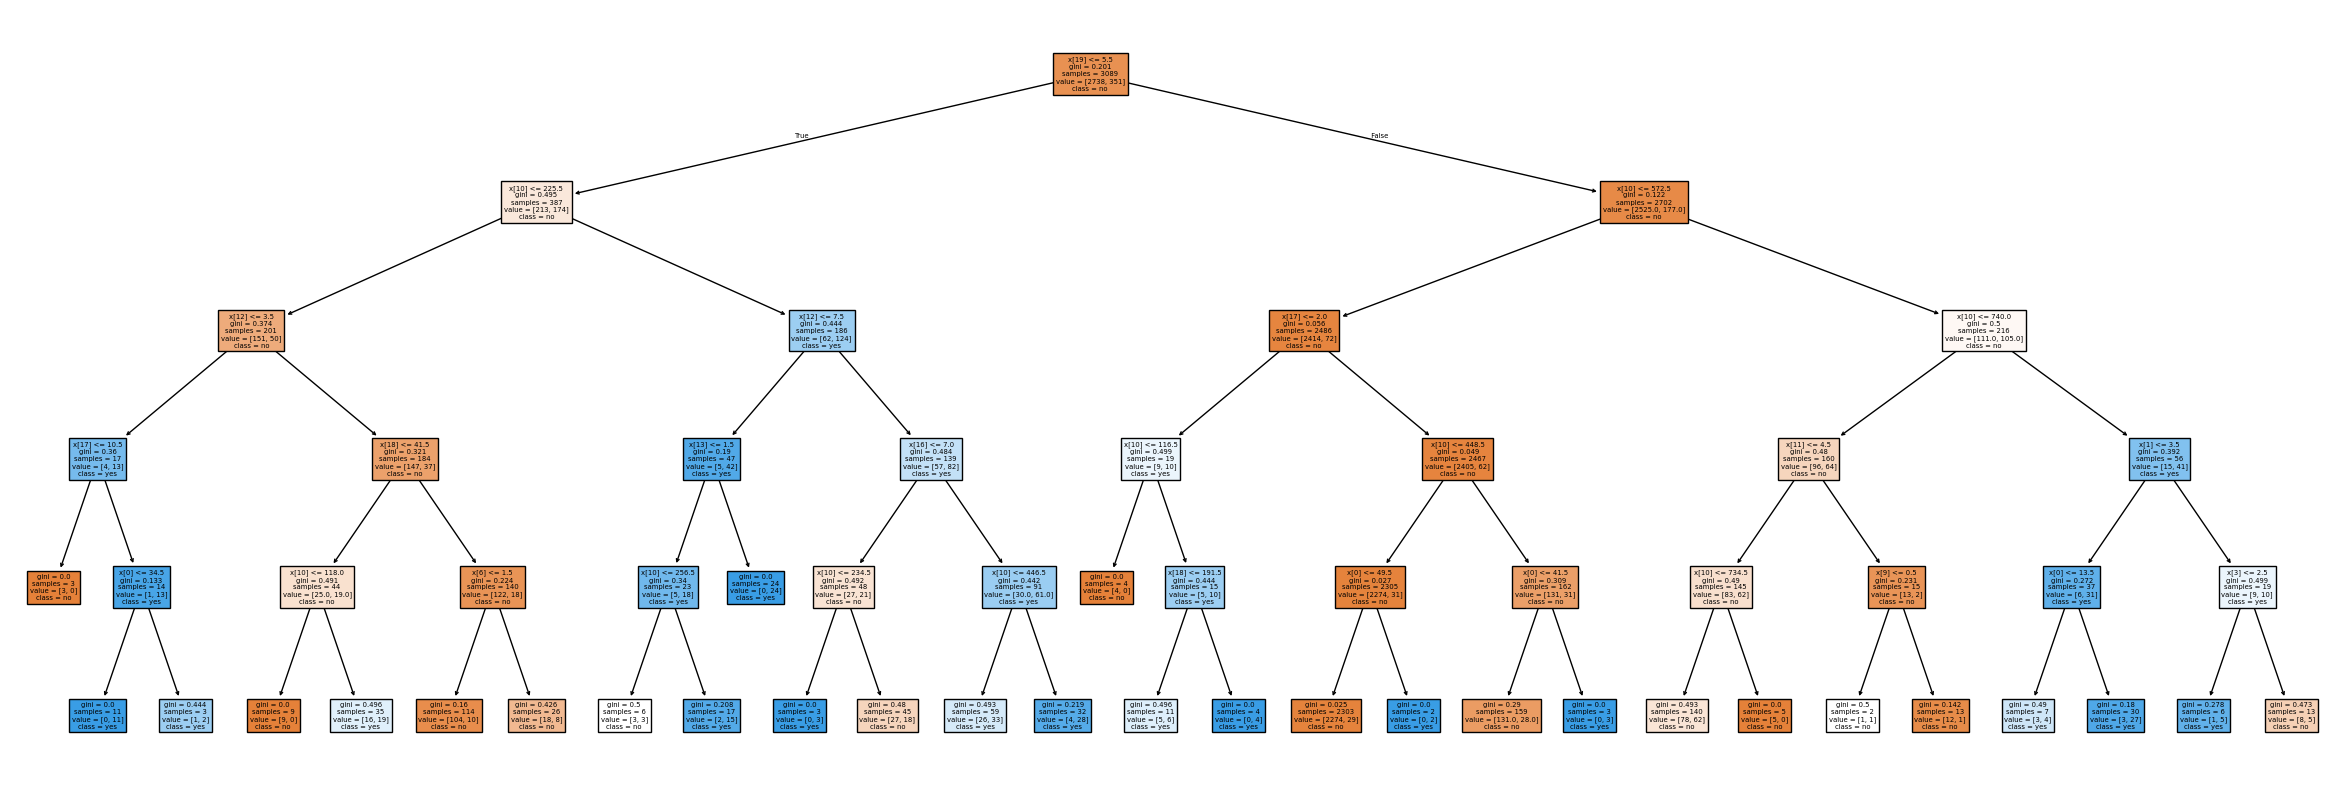

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/avina/Downloads/bank-additional.csv", delimiter=';')
df.rename(columns={'y': 'deposit'}, inplace=True)

cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

df_encoded = df.apply(LabelEncoder().fit_transform)

X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(X_train, y_train)

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(f'Training Score: {train_score}')
print(f'Testing Score: {test_score}')

y_pred = dt.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

plt.figure(figsize=(30, 10))
plot_tree(dt, class_names=['no', 'yes'], filled=True)
plt.show()
